# Simulate a transcriptome with TE transcripts using polyester

1. Generate transcriptome, index it, and simulate reads ([see code](./make_l1hs_chr22_txome.py))
 - Spliced and unspliced transcripts from GENCODE annotation
 - L1 transcripts from full-length L1HS annotations in reference genome

2. Quantify reads with salmon
 - build index of transcriptome (use same transcriptome from step 1)
 - quantify reads with salmon

3. Compare with original count matrix

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.bench import BenchmarkSalmon

In [2]:
bm = BenchmarkSalmon(
    reads_dir="../resources/chr22_l1hs_txome/sim_reads_1",
    txome_dir="../resources/chr22_l1hs_txome",
)
# bm.index()
bm.quant()
benchmark = bm.read_counts()

[INFO:src.bench: 10-24 22:26:57] - Running Salmon quant for sample_01
[INFO:src.bench: 10-24 22:27:45] - Running Salmon quant for sample_02
[INFO:src.bench: 10-24 22:28:32] - Running Salmon quant for sample_03
[INFO:src.bench: 10-24 22:29:20] - Running Salmon quant for sample_04
[INFO:src.bench: 10-24 22:30:07] - Running Salmon quant for sample_05
[INFO:src.bench: 10-24 22:30:54] - Running Salmon quant for sample_06
/logg/LOG-G4/mcuoco/projects/bulk_te_bench/.conda/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.05, 'Red points = L1 transcripts')

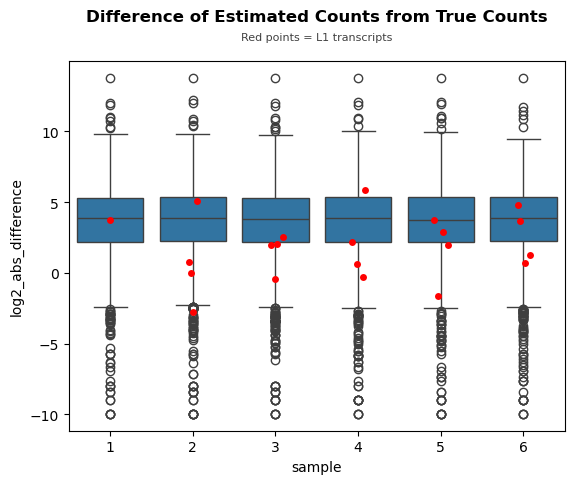

In [4]:
ax = plt.gca()
sns.boxplot(
    data=benchmark[~benchmark.tx_id.str.contains("chr")],
    x="sample",
    y="log2_abs_difference",
    ax=ax,
)
sns.stripplot(
    data=benchmark[benchmark.tx_id.str.contains("chr")],
    x="sample",
    y="log2_abs_difference",
    ax=ax,
    color="red",
)
ax.text(
    x=0.5,
    y=1.1,
    s="Difference of Estimated Counts from True Counts",
    fontsize=12,
    weight="bold",
    ha="center",
    va="bottom",
    transform=ax.transAxes,
)
ax.text(
    x=0.5,
    y=1.05,
    s="Red points = L1 transcripts",
    fontsize=8,
    alpha=0.75,
    ha="center",
    va="bottom",
    transform=ax.transAxes,
)

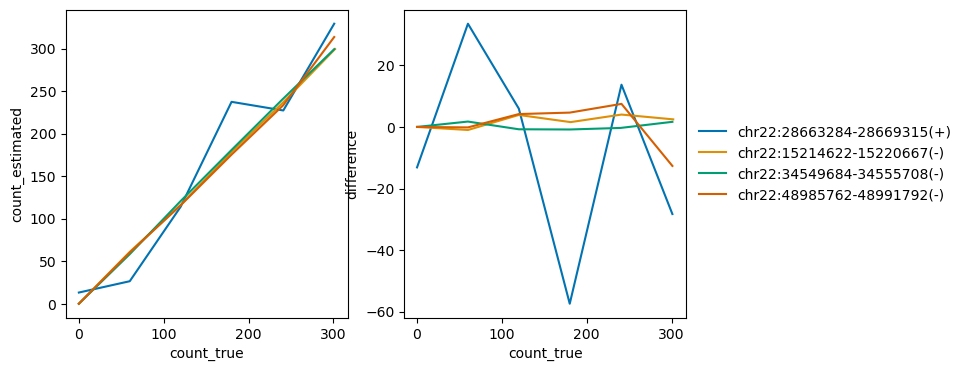

In [5]:
# estimated vs true counts for L1 transcripts

plot_df = benchmark[benchmark.tx_id.str.contains("chr")]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

sns.lineplot(
    data=plot_df,
    x="count_true",
    y="count_estimated",
    hue="tx_id",
    palette="colorblind",
    ax=ax1,
)

sns.lineplot(
    data=plot_df,
    x="count_true",
    y="difference",
    hue="tx_id",
    palette="colorblind",
    ax=ax2,
)

# remove legends
ax1.legend_.remove()

# move ax2 legend outside
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(
    handles=handles,
    labels=labels,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    frameon=False,
)

## Next steps:

1. How does this compare to TEtranscripts, SQuIRE, and L1EM??
	- add each program to conda environment
	- write subclass in `src/bench.py` to run each program 
2. Simulate reads with non-uniform distributions in L1 only. Choose different number for each L1 in each sample. Add to `make_l1hs_chr22_txome.py` script.
3. Simulate reads with non-uniform distributions in non-L1, constant L1. Add to `make_l1hs_chr22_txome.py` script.

	To generate a more realistic simulation, see Salmon Paper methods on Polyester simulations https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5600148/

4. Try different salmon indexing (-k) and quantification parameters (e.g. --seqBias, --gcBias, --posBias)
5. Inspect intermediate results of salmon (where are L1 reads mapping?)